In [ ]:
# Run this code to create a time-varying stimulus trajectory. Stimulus saved in stimulus.cvs and stimulus_timing.cvs

In [1]:
from brian2 import *
import numpy as np

In [2]:
start_scope()
seed(13) #fixed seed for reproducable stimulus
ornstein_uhlenbeck_process = NeuronGroup(
    1,
    """
    tau : second
    sigma : 1
    ds/dt = -(s)/tau + sqrt(2*sigma**2/tau)*xi : 1
    """,
    method="euler"
)

ornstein_uhlenbeck_process.tau = np.array([0.5]) * second
ornstein_uhlenbeck_process.sigma = np.array([0.1])
ornstein_uhlenbeck_process.s = rand()
defaultclock.dt = 0.1 * ms
M = StateMonitor(ornstein_uhlenbeck_process, "s", record=True)

run(1 * second)

stim = M.s
s_t = M.t

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


Text(0, 0.5, 'Stimulus (a.u.)')

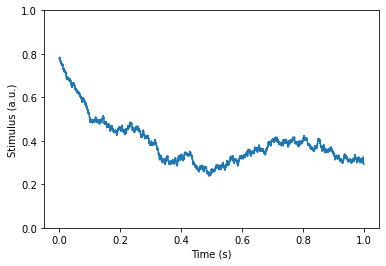

In [3]:
plot(M.t[:], stim[0,:])
ylim([0,1])
xlabel('Time (s)')
ylabel('Stimulus (a.u.)')

In [4]:
numpy.savetxt("stimulus.csv", np.asarray(stim), delimiter=",")

numpy.savetxt("stimulus_timing.csv", np.asarray(s_t), delimiter=",")